## TRABAJO PRACTICO DATA SCIENCE III CODERHOUSE - NLP & DEEP LEARNING

**Alumna**: Emilia Cúneo

### INTRODUCCION    
#### DESCRIPCION DEL PROBLEMA DE NEGOCIO Y OBJETIVOS

A la hora de abrir o gestionar un hotel, es fundamental comprender qué aspectos valoran más los clientes. Las reseñas en línea ofrecen una fuente rica de información sobre sus experiencias, expectativas y niveles de satisfacción. Sin embargo, la gran cantidad de opiniones disponibles hace que su análisis manual sea poco práctico. 
Este proyecto busca aplicar técnicas de procesamiento de lenguaje natural (NLP) para analizar automáticamente reseñas de hoteles. El objetivo es identificar patrones recurrentes, detectar aspectos positivos y negativos, y construir una base para un modelo de análisis de sentimiento que permita interpretar la percepción general de los huéspedes.
Este tipo de análisis puede ser de gran utilidad tanto para emprendedores que están evaluando abrir un nuevo hotel como para responsables de hoteles ya en funcionamiento que desean mejorar sus servicios o entender mejor la voz del cliente.

### ORIGEN DE LOS DATOS
El dataset que se usará en este trabajo es de Kaggle: https://www.kaggle.com/datasets/andrewmvd/trip-advisor-hotel-reviews?resource=download

### IMPORTACION DE DATOS

In [539]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


In [541]:
pip install textblob

   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   --------------------------------- ------ 524.3/624.3 kB 8.2 MB/s eta 0:00:01
   ---------------------------------------- 624.3/624.3 kB 2.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [641]:
#Se importan las librerias que usaremos en el trabajo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import re
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger_eng')
from nltk.corpus import stopwords,wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from wordcloud import WordCloud
from textblob import TextBlob
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\emili\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\emili\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\emili\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\emili\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


### CARGA DE DATOS

In [547]:
# Se sube el archivo
df_reviews = pd.read_csv("tripadvisor_hotel_reviews.csv")

### EXPLORACION DE DATOS

In [550]:
#Primero se usa el comando head para tener un primer vistazo de la tabla y los valores
df_reviews.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [552]:
#Tambien usamos el comando info para tener un primer vistazo de la información general del dataset
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [554]:
df_reviews.shape

(20491, 2)

A partir de estos comandos se puede ver que el dataset tiene dos columnas y 20491 registros. A su vez, se puede determinar que no hay registros nulos.  Las columnas que tiene este dataset(variables) son:  
. **Review**: Es la reseña sobre el hotel propiamente dicha, escrita en texto.  
. **Rating**: Puntaje del 1 al 5 que se le asigna como puntuación junto a la reseña.

## DESARROLLO  
### PREPROSESAMIENTO Y LIMPIEZA DE DATOS  
Lo primero que se hace es normalizar el texto de las reviews para poder trabajarlas despues. Se pasa todo a minúsculas y se eliminan los símbolos, signos de puntuación y espacios en blanco de más.

In [558]:
def limpiar_texto(texto):
    if isinstance(texto, str):
        texto = texto.lower() 
        texto = re.sub(r'[^a-zA-Z\s]', '', texto)  
        texto = re.sub(r'\s+', ' ', texto)
        return texto.strip()
    else:
        return ""

# Crear una nueva columna con el texto limpio
df_reviews['review_limpio'] = df_reviews['Review'].apply(limpiar_texto)

In [560]:
#Se revisa si funcionó 
df_reviews.head()

,Review,Rating,review_limpio
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...
1,ok nothing special charge diamond member hilto...,2,ok nothing special charge diamond member hilto...
2,nice rooms not 4* experience hotel monaco seat...,3,nice rooms not experience hotel monaco seattle...
3,"unique, great stay, wonderful time hotel monac...",5,unique great stay wonderful time hotel monaco ...
4,"great stay great stay, went seahawk game aweso...",5,great stay great stay went seahawk game awesom...


Se puede comprobar que no hay más signos de puntuación, números, etc.

### TOKENIZACIÓN  
Como siguiente paso se convierte el texto en una lista de palabras(tokens), en unidades más pequeñas para su análisis individual.

In [564]:
# Se aplica tokenización a la columna de texto limpio
df_reviews['tokens'] = df_reviews['review_limpio'].apply(word_tokenize)

In [565]:
df_reviews['tokens']

0        [nice, hotel, expensive, parking, got, good, d...
1        [ok, nothing, special, charge, diamond, member...
2        [nice, rooms, not, experience, hotel, monaco, ...
3        [unique, great, stay, wonderful, time, hotel, ...
4        [great, stay, great, stay, went, seahawk, game...
                               ...                        
20486    [best, kept, secret, rd, time, staying, charm,...
20487    [great, location, price, view, hotel, great, q...
20488    [ok, just, looks, nice, modern, outside, desk,...
20489    [hotel, theft, ruined, vacation, hotel, opened...
20490    [people, talking, ca, nt, believe, excellent, ...
Name: tokens, Length: 20491, dtype: object

Se observa como cada registro quedó dividido en tokens, es decir en palabras separadas por una coma.

### WORDCLOUD  
Veamos como se ve de forma visual del texto. Se puede ver la frecuencia de las palabras( visualmente, a mas grande la palabra, mayor frecuencia) y permite ver cuales son los temas con mayor frecuencia en los comentarios de los clientes.

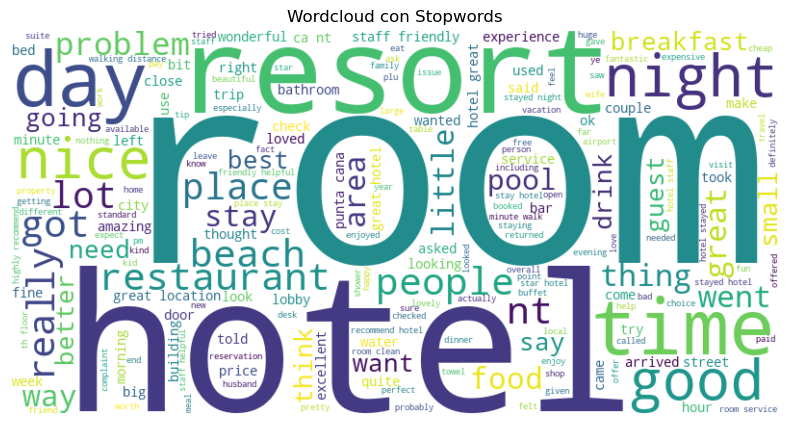

In [570]:
text_all = ' '.join([' '.join(tokens) for tokens in df_reviews['tokens']])

wordcloud_all = WordCloud(width=800, height=400, background_color='white').generate(text_all)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_all, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud con Stopwords')
plt.show()

Se pueden ver algunas palabras que no tienen ningun tipo de utilidad para el trabajo que queremos hacer. A partir de esto y antes de entrar a un análisis más profundo, eliminaremos stopwords.

### STOPWORDS  
El siguiente paso es eliminar las stopwords, es decir las palabras vacías, esas que no aportan nada cuando hay una búsqueda de análisis. Eliminamos estas palabras para quedarnos con las más significativas.

In [574]:
#Se elige el idioma inglés para el análisis
stop_words = set(stopwords.words('english')) 

def remove_stopwords_from_tokens(tokens):
    return [word for word in tokens if word.lower() not in stop_words]

# Aplicar a la columna
df_reviews['review_sw'] = df_reviews['tokens'].apply(remove_stopwords_from_tokens)

In [576]:
df_reviews.head()

,Review,Rating,review_limpio,tokens,review_sw
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,"[nice, hotel, expensive, parking, got, good, d...","[nice, hotel, expensive, parking, got, good, d..."
1,ok nothing special charge diamond member hilto...,2,ok nothing special charge diamond member hilto...,"[ok, nothing, special, charge, diamond, member...","[ok, nothing, special, charge, diamond, member..."
2,nice rooms not 4* experience hotel monaco seat...,3,nice rooms not experience hotel monaco seattle...,"[nice, rooms, not, experience, hotel, monaco, ...","[nice, rooms, experience, hotel, monaco, seatt..."
3,"unique, great stay, wonderful time hotel monac...",5,unique great stay wonderful time hotel monaco ...,"[unique, great, stay, wonderful, time, hotel, ...","[unique, great, stay, wonderful, time, hotel, ..."
4,"great stay great stay, went seahawk game aweso...",5,great stay great stay went seahawk game awesom...,"[great, stay, great, stay, went, seahawk, game...","[great, stay, great, stay, went, seahawk, game..."


Habiendo eliminado las stopwords, se volverá a probar aplicar wordcloud, pero antes de eso se realizará la lematización para reducir las palabras a su forma base, agrupando variantes de una misma palabra. Lo cual contribuye y mejora la visualización en herramientas como wordcloud, analisis de sentimiento, etc.

### LEMATIZACIÓN

In [580]:
# Se usa una función para que se diferencien las palabras en verbos, sustantivos, adjetivos.
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN 

In [582]:
def lemmatize_token_list(token_list):
    pos_tags = pos_tag(token_list)
    return [lemmatizer.lemmatize(word, get_wordnet_pos(pos)) for word, pos in pos_tags]

df_reviews['lemmatized_tokens'] = df_reviews['review_sw'].apply(lemmatize_token_list)

In [584]:
df_reviews.head()

,Review,Rating,review_limpio,tokens,review_sw,lemmatized_tokens
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,"[nice, hotel, expensive, parking, got, good, d...","[nice, hotel, expensive, parking, got, good, d...","[nice, hotel, expensive, parking, get, good, d..."
1,ok nothing special charge diamond member hilto...,2,ok nothing special charge diamond member hilto...,"[ok, nothing, special, charge, diamond, member...","[ok, nothing, special, charge, diamond, member...","[ok, nothing, special, charge, diamond, member..."
2,nice rooms not 4* experience hotel monaco seat...,3,nice rooms not experience hotel monaco seattle...,"[nice, rooms, not, experience, hotel, monaco, ...","[nice, rooms, experience, hotel, monaco, seatt...","[nice, room, experience, hotel, monaco, seattl..."
3,"unique, great stay, wonderful time hotel monac...",5,unique great stay wonderful time hotel monaco ...,"[unique, great, stay, wonderful, time, hotel, ...","[unique, great, stay, wonderful, time, hotel, ...","[unique, great, stay, wonderful, time, hotel, ..."
4,"great stay great stay, went seahawk game aweso...",5,great stay great stay went seahawk game awesom...,"[great, stay, great, stay, went, seahawk, game...","[great, stay, great, stay, went, seahawk, game...","[great, stay, great, stay, go, seahawk, game, ..."


Se puede ver por ejemplo, como de went( verbo go en pasado) paso a go, entonces no se tendrán todas las variables del verbo ir en sus diferentes tiempos verbales. Esto es de utilidad para el análisis. Ahora se probará de forma visual a partir de wordcloud

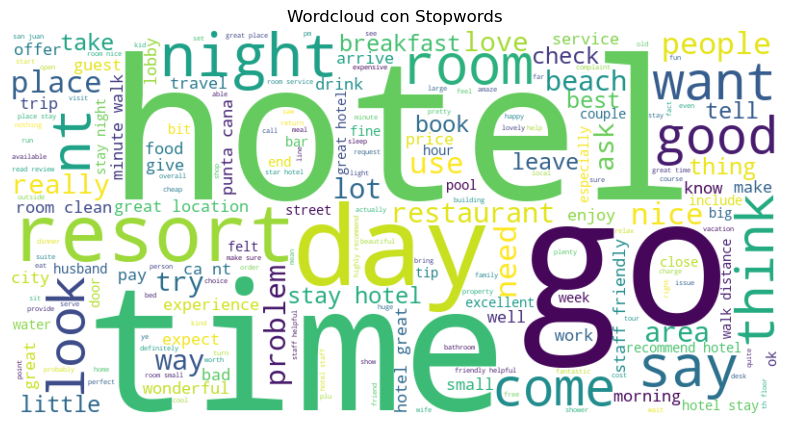

In [587]:
text_all = ' '.join([' '.join(tokens) for tokens in df_reviews['lemmatized_tokens']])

wordcloud_all = WordCloud(width=800, height=400, background_color='white').generate(text_all)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_all, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud con Stopwords')
plt.show()

A partir de este resultado se puede ver que sigue habiendo palabras que pese a no estar dentro de la lista de stopwords no aportan ningún valor a la hora de analizar las reseñas. Por ejemplo: hotel, todas las reseñas son sobre un hotel, por lo tanto no nos interesa esa palabra para el análisis, lo mismo que resort, really, think, know,go, etc. A su vez, se agregarán palabras que denoten como fue la experiencia como great,perfect, etc, ya que lo que se busca, en este punto, es ver cuáles son las temáticas más recurrentes por parte de los huéspedes en las reseñas. Nos interesa saber a que cosa le da más importancia. Al ser reseñas de muchos hoteles distintos, no interesa en este momento saber si su experiencia fue buena o no. Más adelante será de mayoor utilidad.
A continuación se incluirán a la lista de stopwords estas palabras que no aportan al análisis que queremos realizar.

In [590]:
palabras_extras = ['hotel','resort','go','really','know','stay hotel','great','think','beautiful','want','place','wonderful','time','experience','friendly'
                  'need','way','ca','nt','good','say','need','day','nice','night','look','little','use','stay','thing','come','leave','book','best','enjoy',
                  'love','ask','problem','try','bad','tell','take','expect','area','guest','lot','make','check','sure','husband']
stop_words.update(palabras_extras)

df_reviews['lemmatized_clean'] = df_reviews['lemmatized_tokens'].apply(lambda x: [word for word in x if word not in stop_words])

In [592]:
df_reviews

,Review,Rating,review_limpio,tokens,review_sw,lemmatized_tokens,lemmatized_clean
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,"[nice, hotel, expensive, parking, got, good, d...","[nice, hotel, expensive, parking, got, good, d...","[nice, hotel, expensive, parking, get, good, d...","[expensive, parking, get, deal, anniversary, a..."
1,ok nothing special charge diamond member hilto...,2,ok nothing special charge diamond member hilto...,"[ok, nothing, special, charge, diamond, member...","[ok, nothing, special, charge, diamond, member...","[ok, nothing, special, charge, diamond, member...","[ok, nothing, special, charge, diamond, member..."
2,nice rooms not 4* experience hotel monaco seat...,3,nice rooms not experience hotel monaco seattle...,"[nice, rooms, not, experience, hotel, monaco, ...","[nice, rooms, experience, hotel, monaco, seatt...","[nice, room, experience, hotel, monaco, seattl...","[room, monaco, seattle, levelpositives, large,..."
3,"unique, great stay, wonderful time hotel monac...",5,unique great stay wonderful time hotel monaco ...,"[unique, great, stay, wonderful, time, hotel, ...","[unique, great, stay, wonderful, time, hotel, ...","[unique, great, stay, wonderful, time, hotel, ...","[unique, monaco, location, excellent, short, s..."
4,"great stay great stay, went seahawk game aweso...",5,great stay great stay went seahawk game awesom...,"[great, stay, great, stay, went, seahawk, game...","[great, stay, great, stay, went, seahawk, game...","[great, stay, great, stay, go, seahawk, game, ...","[seahawk, game, awesome, downfall, view, build..."
...,...,...,...,...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,best kept secret rd time staying charm not sta...,"[best, kept, secret, rd, time, staying, charm,...","[best, kept, secret, rd, time, staying, charm,...","[best, kept, secret, rd, time, stay, charm, st...","[kept, secret, rd, charm, star, beat, increase..."
20487,great location price view hotel great quick pl...,4,great location price view hotel great quick pl...,"[great, location, price, view, hotel, great, q...","[great, location, price, view, hotel, great, q...","[great, location, price, view, hotel, great, q...","[location, price, view, quick, sightsdirectly,..."
20488,"ok just looks nice modern outside, desk staff ...",2,ok just looks nice modern outside desk staff n...,"[ok, just, looks, nice, modern, outside, desk,...","[ok, looks, nice, modern, outside, desk, staff...","[ok, look, nice, modern, outside, desk, staff,...","[ok, modern, outside, desk, staff, particularl..."
20489,hotel theft ruined vacation hotel opened sept ...,1,hotel theft ruined vacation hotel opened sept ...,"[hotel, theft, ruined, vacation, hotel, opened...","[hotel, theft, ruined, vacation, hotel, opened...","[hotel, theft, ruin, vacation, hotel, open, se...","[theft, ruin, vacation, open, sept, week, happ..."


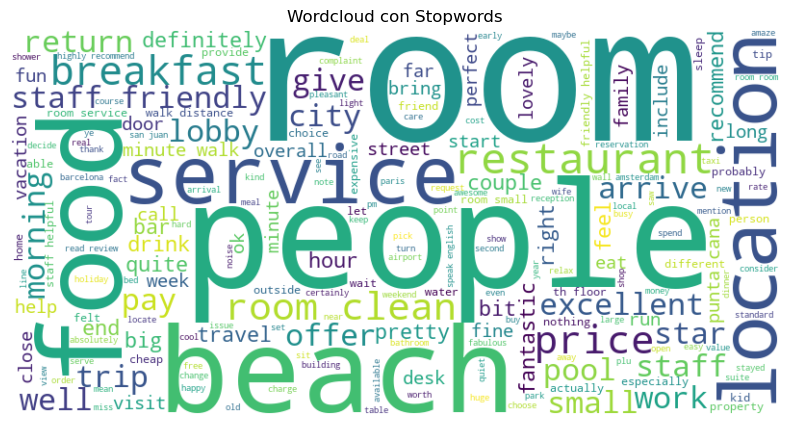

In [594]:
text_all = ' '.join([' '.join(tokens) for tokens in df_reviews['lemmatized_clean']])

wordcloud_all = WordCloud(width=800, height=400, background_color='white').generate(text_all)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_all, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud con Stopwords')
plt.show()

Luego del procesamiento y análisis de texto de las reseñas hoteleras, se identificaron las palabras más frecuentes por los usuarios, lo que permite extraer los principales focos de atención a la hora de valorar su estadia.  
Como se puede ver en la nube de palabras, las palabras más destacadas son:  
**People**: Esto puede indicar que el trato del personal o las interacciones humanas( tanto con el personal como con otros huéspedes) tienen un peso relevante en la percepción general del servicio.  
**Room**: Esto indica que las condiciones en las que se encuentra el alojamiento(comodidad, tamaño, limpieza) son factores centrales para la satisfacción del cliente.  
**Service**: Esta palabra podemos sumarla a la palabra people. Refuerza la importancia de la atención recibida.  
**Location**: Se puede sumar la importancia de la ubicación del hotel a la hora de tomar una decisión.  
**Food, Restaurant,Breakfast**: La experiencia gastronómica forma parte integral de la evaluación del hotel.  
**Beach**: Esto puede indicar que el acceso o la vista a la playa es un valor destacado por los huespedes.  
Por último, destacamos el precio, que aparece en el diagrama también pero no tan grande como el resto de las palabras. En base a esto podemos pensar que es algo que los húespedes toman en cuenta a la hora de elegir un lugar, pero valoran más otras cosas antes que el precio. 

### ANALISIS DE SENTIMIENTO

In [603]:
df_reviews["sentiment_score_tb"] = df_reviews["review_limpio"].apply(lambda x: TextBlob(x).sentiment.polarity)

def classify_sentiment_tb(score):
    if score > 0.1:
        return "positive"
    elif score < -0.1:
        return "negative"
    else:
        return "neutral"

df_reviews["sentiment_label_tb"] = df_reviews["sentiment_score_tb"].apply(classify_sentiment_tb)

In [605]:
df_reviews.head(20)

,Review,Rating,review_limpio,tokens,review_sw,lemmatized_tokens,lemmatized_clean,sentiment_score_tb,sentiment_label_tb
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,"[nice, hotel, expensive, parking, got, good, d...","[nice, hotel, expensive, parking, got, good, d...","[nice, hotel, expensive, parking, get, good, d...","[expensive, parking, get, deal, anniversary, a...",0.208744,positive
1,ok nothing special charge diamond member hilto...,2,ok nothing special charge diamond member hilto...,"[ok, nothing, special, charge, diamond, member...","[ok, nothing, special, charge, diamond, member...","[ok, nothing, special, charge, diamond, member...","[ok, nothing, special, charge, diamond, member...",0.227204,positive
2,nice rooms not 4* experience hotel monaco seat...,3,nice rooms not experience hotel monaco seattle...,"[nice, rooms, not, experience, hotel, monaco, ...","[nice, rooms, experience, hotel, monaco, seatt...","[nice, room, experience, hotel, monaco, seattl...","[room, monaco, seattle, levelpositives, large,...",0.294420,positive
3,"unique, great stay, wonderful time hotel monac...",5,unique great stay wonderful time hotel monaco ...,"[unique, great, stay, wonderful, time, hotel, ...","[unique, great, stay, wonderful, time, hotel, ...","[unique, great, stay, wonderful, time, hotel, ...","[unique, monaco, location, excellent, short, s...",0.504825,positive
4,"great stay great stay, went seahawk game aweso...",5,great stay great stay went seahawk game awesom...,"[great, stay, great, stay, went, seahawk, game...","[great, stay, great, stay, went, seahawk, game...","[great, stay, great, stay, go, seahawk, game, ...","[seahawk, game, awesome, downfall, view, build...",0.384615,positive
5,love monaco staff husband stayed hotel crazy w...,5,love monaco staff husband stayed hotel crazy w...,"[love, monaco, staff, husband, stayed, hotel, ...","[love, monaco, staff, husband, stayed, hotel, ...","[love, monaco, staff, husband, stay, hotel, cr...","[monaco, staff, crazy, weekend, attend, memori...",0.243056,positive
6,"cozy stay rainy city, husband spent 7 nights m...",5,cozy stay rainy city husband spent nights mona...,"[cozy, stay, rainy, city, husband, spent, nigh...","[cozy, stay, rainy, city, husband, spent, nigh...","[cozy, stay, rainy, city, husband, spend, nigh...","[cozy, rainy, city, spend, monaco, early, janu...",0.366661,positive
7,"excellent staff, housekeeping quality hotel ch...",4,excellent staff housekeeping quality hotel cho...,"[excellent, staff, housekeeping, quality, hote...","[excellent, staff, housekeeping, quality, hote...","[excellent, staff, housekeep, quality, hotel, ...","[excellent, staff, housekeep, quality, chock, ...",0.562963,positive
8,"hotel stayed hotel monaco cruise, rooms genero...",5,hotel stayed hotel monaco cruise rooms generou...,"[hotel, stayed, hotel, monaco, cruise, rooms, ...","[hotel, stayed, hotel, monaco, cruise, rooms, ...","[hotel, stay, hotel, monaco, cruise, room, gen...","[monaco, cruise, room, generous, decorate, uni...",0.312946,positive
9,excellent stayed hotel monaco past w/e delight...,5,excellent stayed hotel monaco past we delight ...,"[excellent, stayed, hotel, monaco, past, we, d...","[excellent, stayed, hotel, monaco, past, delig...","[excellent, stay, hotel, monaco, past, delight...","[excellent, monaco, past, delight, reception, ...",0.286355,positive


<Axes: title={'center': 'Promedio de Sentimiento según Rating'}, xlabel='Rating', ylabel='Polaridad (TextBlob)'>

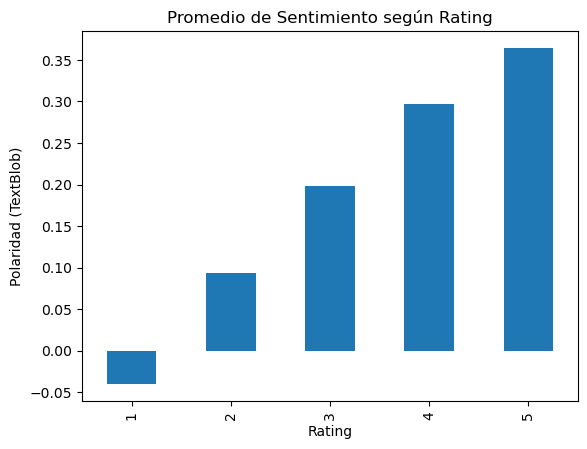

In [609]:
df_reviews.groupby("Rating")["sentiment_score_tb"].mean().plot(kind="bar", title="Promedio de Sentimiento según Rating", ylabel="Polaridad (TextBlob)", xlabel="Rating")

Este gráfico muestra la relación entrer las valoraciones numéricas(de 1 a 5 estrellas) y el análisis de sentimiento realizado con TextBlob sobre las reseñas de hoteles. Se puede observar una tendencia ascendente clara. Las reseñas con puntuaciones bajas(1 o 2 estrellas) tienen una polaridad promedio cercana a 0 o incluso negativa. Y a medida que el rating aumenta, la polaridad también lo hace, alcanzando los valores más altos en las reseñas con 5 estrellas.
Este resultado es positivo en cuanto al funcionamiento del análisis de sentimiento, es decir hay coherencia entre el tono emocional de los textos y la valoración otorgada.

### TF-IDF

Ahora se realizará un modelo de aprendizaje supervisado para clasificar los distintos comentarios que pudiera haber en un futuro y que el modelo pueda 
predecir su raiting. Se utilizará Raiting como columna de label para entrenar y luego testear el modelo.  
Para esto se agruparán los raitings con valor 4 y 5 como 1 ( positivos) y los 1 y 2 como 0 ( negativos). Los que tengan valor 3, se eliminarán para el análisis ( valores neutros).

In [629]:
# Se eliminan los comentarios neutros (rating = 3)
df_binario = df_reviews[df_reviews["Rating"] != 3].copy()

# Se crea la variable binaria
df_binario["sentimiento_binario"] = df_binario["Rating"].apply(lambda x: 1 if x >= 4 else 0)
df_binario["review_lemmatized_text"] = df_binario["lemmatized_tokens"].apply(lambda tokens: " ".join(tokens))

In [634]:
# TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df_binario["review_lemmatized_text"]) 
y = df_binario["sentimiento_binario"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [638]:
# Entrenamiento
model = LogisticRegression()
model.fit(X_train, y_train)

# Predicción
y_pred = model.predict(X_test)

# Evaluación
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 489  169]
 [  31 2973]]
              precision    recall  f1-score   support

           0       0.94      0.74      0.83       658
           1       0.95      0.99      0.97      3004

    accuracy                           0.95      3662
   macro avg       0.94      0.87      0.90      3662
weighted avg       0.95      0.95      0.94      3662



A partir de estos resultados se puede ver que el accuracy dió un valor de 0.95, es decir que el 95 % de las predicciones fueron correctas. Por otro lado, en la matriz de confusión se puede ver que 169 veces el modelo predijo positivo cuando eran negativo (falsos positivos) y 31 veces dijo negativo cunado era positivo (falsos negativos).
Con estos resultados se puede decir que el modelo TF-IDF fue efectivo para diferenciar entre opiniones positivas y negativas. El recall de clase 1 (opiniones positivas) fue de 0.99, lo que significa que casi todas las reviews positivas fueron correctamente detectadas. Sin embargo, el recall de clase 0 (opiniones negativas) fue de 0.74, lo que sugiere que el modelo tiende a sobrepredecir positividad.

Lo siguiente que realizamos es aplicar Grid Search, un método de ajuste de hiperparametros para ver si puede optimizar el resultado del modelo.

In [654]:
# Se ddefinen los hiperparámetros a testear
param_grid = {
    'C': [0.01, 0.1, 1, 10],  # Fuerza de regularización
    'penalty': ['l1','l2'],         # Tipo de penalización (l1 necesita solver='liblinear')
    'solver': ['liblinear'],    # Solver compatible con penalización L1 y L2
    'max_iter': [100,200]       # Numero maximo de iteraciones 
}

lr = LogisticRegression()

# Se aplica Grid Search
grid = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, scoring='f1', verbose=1, n_jobs=-1)

grid.fit(X_train, y_train)

print("Mejores parámetros encontrados:", grid.best_params_)

best_model = grid.best_estimator_

y_pred = best_model.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Mejores parámetros encontrados: {'C': 10, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
[[ 534  124]
 [  55 2949]]
              precision    recall  f1-score   support

           0       0.91      0.81      0.86       658
           1       0.96      0.98      0.97      3004

    accuracy                           0.95      3662
   macro avg       0.93      0.90      0.91      3662
weighted avg       0.95      0.95      0.95      3662



Se puede ver como los valores mejoran  despues de optmizar los hiperparámetros. Se puede decir que es un modelo predice bien las reseñas, sobre todo las positivas.

### CONCLUSIÓN

En este proyecto se aplicaron técnicas de procesamiento de lenguaje natural (NLP) para analizar sentimientos en reseñas de hoteles. Se realizó una limpieza y normalización del texto, se eliminaron stopwords y se aplicó la técnica TF-IDF para vectorizar los datos. Luego, se implementó un modelo supervisado de regresión logística, optimizado mediante Grid Search para encontrar los mejores hiperparámetros. El modelo logró un accuracy del 95%, con un excelente desempeño en la predicción de reseñas positivas (recall del 98%). Si bien el recall en las reseñas negativas fue menor (81%), los resultados generales muestran un modelo con métricas de F1-score altas y bien balanceadas.  
Esta solución puede ser especialmente útil para empresas del sector turístico y hotelero, ya que permite automatizar el análisis de grandes volúmenes de opiniones de clientes, detectar tendencias, identificar áreas de mejora y responder de manera más estratégica a las valoraciones negativas. De esta forma, se pueden tomar decisiones basadas en datos reales y mejorar la experiencia del cliente.